In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Aprendizaje de Máquina y Análisis Geospacial (AMAG).

## Clase 3: Manejo de Datos Geoespaciales en Python.

En este ejercicio, aprenderemos a utilizar librerías específicas de Python como `Shapely` y `Geopandas` para leer, crear, visualizar, manipular y analizar capas de datos vectoriales. A partir de un conjunto de datos geoespaciales relativos a la comuna de Providencia, estudiaremos el entorno urbano para responder algunas preguntas como:
- ¿Cuál es la superficie y perímetro de la comuna?
- ¿ A qué distancia está el SII del centro de la comuna?
- ¿Cuáles son las áreas con mayor densidad de población de la comuna?
- ¿Cuántos restaurants hay a una distancia caminable de las oficinas del SII? ¿Cuál es el más cercano?
- ¿Qué manzanas tienen al menos un restaurant a distancia caminable?

### Datos.

Los datos entregados para este ejercicio corresponden a las siguiente capas:

- Cartografía de manzanas censales 2017:`MANZANA_IND_C17.shp`
- Límites de la comuna de Providencia:`Providencia.gpkg`
- Ubicación de restaurants en la comuna de Providencia: `restaurants_providencia.csv`


## 1. Importación de librerías.

Primero importamos las librerías requeridas para este trabajo utilizando algunas abreviaciones o alias comunes. La línea `%matplotlib inline` permite desplegar gráficos de matplotlib directo en el Notebook.


In [4]:
%matplotlib inline

import pandas as pd, numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely

## 2. Lectura e inspección de capas vectoriales.

La librería `Geopandas` provee funcionalidades para leer y escribir archivos vectoriales en varios de los formatos soportados por GDAL: https://gdal.org/drivers/vector/index.html

Podemos ver el listado de los drivers disponibles con el siguiente comando:

In [5]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

La función `gpd.read_file()` permite leer archivos vectoriales en cualquiera de los formatos indicados arriba, y devuelve un `GeoDataFrame`. Este objeto tiene una estructura tabular que contiene una columna llamada `geometry`que contiene una `GeoSeries`, y otras columnas adicionales correspondientes a los atributos asociados a cada geometría.

Tanto `GeoDataFrame` como `GeoSeries` implementan varios métodos y atributos que permiten inspeccionar, visualizar y manipular los datos leidos. Veremos varios ejemplos a continuación.

Leamos primero las capas correspondientes a las manzanas censales y límites de Providencia.
- ¿Qué información contiene cada conjunto de datos?
- ¿En qué CRS están estos datos?


In [6]:
#Leemos la capa de manzanas
manz=gpd.read_file('MANZANA_IND_C17.shp')

#Veamos que devuelve la funcion read_file
print(type(manz))

#Visualizamos las 5 primeras filas
manz.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOCALIDAD,ENTIDAD_MA,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Shape_Leng,Shape_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,2,1,CD,13101071001002,764,287,0.005560,1.354544e-06,"POLYGON ((-70.67695 -33.42691, -70.67685 -33.4..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,8,1,2,1,CD,13101081001002,1307,509,0.006557,2.630422e-06,"POLYGON ((-70.67362 -33.42898, -70.67517 -33.4..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,3,1,CD,13101071001003,64,17,0.003859,5.979183e-07,"POLYGON ((-70.67812 -33.42803, -70.67813 -33.4..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,4,1,CD,13101071001004,52,21,0.004683,1.265246e-06,"POLYGON ((-70.68043 -33.42897, -70.68046 -33.4..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,8,1,CD,13101071001008,67,14,0.003491,7.452443e-07,"POLYGON ((-70.67805 -33.42921, -70.67858 -33.4..."


In [7]:
#Informacion de la capa: tipos de datos, columnas, CRS
print(manz.info())

print('Columnas:',manz.columns)

print('CRS:',manz.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48803 entries, 0 to 48802
Data columns (total 17 columns):
REGION        48803 non-null object
NOM_REGION    48803 non-null object
PROVINCIA     48803 non-null object
NOM_PROVIN    48803 non-null object
COMUNA        48803 non-null object
NOM_COMUNA    48803 non-null object
DISTRITO      48803 non-null int64
LOCALIDAD     48803 non-null int64
ENTIDAD_MA    48803 non-null int64
CATEGORIA     48803 non-null int64
NOM_CATEGO    48803 non-null object
MANZENT_I     48803 non-null object
TOTAL_PERS    48803 non-null int64
TOTAL_VIVI    48803 non-null int64
Shape_Leng    48803 non-null float64
Shape_Area    48803 non-null float64
geometry      48803 non-null geometry
dtypes: float64(2), geometry(1), int64(6), object(8)
memory usage: 6.3+ MB
None
Columnas: Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'DISTRITO', 'LOCALIDAD', 'ENTIDAD_MA', 'CATEGORIA',
       'NOM_CATEGO', 'MANZENT_I', 'TOTAL_P

In [8]:
#Leemos la capa con los límites de Providencia, es inspeccionamos los datos
provi=gpd.read_file('Providencia.gpkg')
provi.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,Shape_Leng,Shape_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,0.160715,0.001396,"MULTIPOLYGON (((350617.294 6302196.780, 350617..."


In [9]:
#Informacion de la capa: tipos de datos, columnas, CRS
print(provi.info())

print('Columnas:',provi.columns)

print('CRS:',provi.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
REGION        1 non-null object
NOM_REGION    1 non-null object
PROVINCIA     1 non-null object
NOM_PROVIN    1 non-null object
COMUNA        1 non-null object
NOM_COMUNA    1 non-null object
Shape_Leng    1 non-null float64
Shape_Area    1 non-null float64
geometry      1 non-null geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 200.0+ bytes
None
Columnas: Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
CRS: epsg:32719


Los datos obtenidos están en distintos sistemas de coordenadas: SIRGAS2000 y UTM. Para poder visualizarlos juntos y realizar operaciones espaciales entre ellos, necesitamos reproyectar alguno de ellos, y convertir todos los datos al mismo CRS o EPSG.

Dado que nos interesa medir distancias (por ejemplo, a los restaurants cercanos al SII), nos conviene utilizar un CRS proyectado, en unidades métricas: UTM 19S, o EPSG: 32719.

Para convertir un `GeoDataFrame` a otro CRS, reproyectamos usando el método `.to_crs`.

In [11]:
manz=manz.to_crs(crs='EPSG:32719')
print('CRS:',manz.crs)
print(manz.geometry)

CRS: EPSG:32719
0        POLYGON ((344096.410 6300127.298, 344107.550 6...
1        POLYGON ((344409.506 6299902.537, 344265.614 6...
2        POLYGON ((343989.345 6300001.313, 343988.286 6...
3        POLYGON ((343776.213 6299893.815, 343773.421 6...
4        POLYGON ((343998.500 6299870.782, 343948.879 6...
                               ...                        
48798    MULTIPOLYGON (((345130.403 6292602.454, 345133...
48799    POLYGON ((343516.840 6292797.778, 343464.863 6...
48800    MULTIPOLYGON (((343621.691 6292917.766, 343571...
48801    POLYGON ((343209.239 6292809.688, 343215.843 6...
48802    MULTIPOLYGON (((343286.965 6292800.216, 343248...
Name: geometry, Length: 48803, dtype: geometry


Nos queda por leer el archivo correspondiente a las ubicaciones de los restaurantes de la comuna. Sin embargo, éste no es un archivo vectorial, sino sólo un archivo de texto delimitado por comas (csv) con el nombre y las coordenadas `(lat,lon)` de cada restaurant. Podemos usar `Pandas` y `Geopandas` para leer los datos y generar un `GeoDataFrame`:

In [12]:
rests=pd.read_csv('restaurants_providencia.csv')
rests.head()

,Unnamed: 0,Name,lat,lon
0,0,Prem de Bokato,-33.430917,-70.606187
1,1,Caleuche,-33.431682,-70.609299
2,2,Los Maestros,-33.426480,-70.609052
3,3,Don Bono Coffee & Bakery,-33.426197,-70.603761
4,6,Restaurant Jin Ying,-33.431168,-70.609647


Para crear un`GeoDataFrame` tenemos que crear una columna de geometrías tipo punto a partir de las coordenadas (lat,lon), y especificar en qué CRS están los datos (WGS84).

In [13]:
grest = gpd.GeoDataFrame(rests, geometry=gpd.points_from_xy(rests.lon, rests.lat),crs='EPSG:4326')
print(grest.crs)
grest.head()

EPSG:4326


,Unnamed: 0,Name,lat,lon,geometry
0,0,Prem de Bokato,-33.430917,-70.606187,POINT (-70.60619 -33.43092)
1,1,Caleuche,-33.431682,-70.609299,POINT (-70.60930 -33.43168)
2,2,Los Maestros,-33.426480,-70.609052,POINT (-70.60905 -33.42648)
3,3,Don Bono Coffee & Bakery,-33.426197,-70.603761,POINT (-70.60376 -33.42620)
4,6,Restaurant Jin Ying,-33.431168,-70.609647,POINT (-70.60965 -33.43117)


De nuevo, nos conviene reproyectar este nuevo conjunto de datos para que todas las capas tengan el mismo CRS:

In [15]:
grest=grest.to_crs(crs='EPSG:32719')
grest.head()

,Unnamed: 0,Name,lat,lon,geometry
0,0,Prem de Bokato,-33.430917,-70.606187,POINT (350682.526 6299786.660)
1,1,Caleuche,-33.431682,-70.609299,POINT (350394.524 6299697.337)
2,2,Los Maestros,-33.426480,-70.609052,POINT (350408.552 6300274.572)
3,3,Don Bono Coffee & Bakery,-33.426197,-70.603761,POINT (350900.044 6300313.541)
4,6,Restaurant Jin Ying,-33.431168,-70.609647,POINT (350361.268 6299753.886)


## 2. Visualización de datos.

Veamos ahora cómo graficar nuestros datas para empezar a crear mapas.

Para ello, el objeto `GeoDataFrame`tiene implementado el método `plot`. Éste está basado en la librería `matplotlib`, por lo que hereda gran parte de sus argumentos y funcionalidades.

Veamos primero Providencia y sus restaurants:


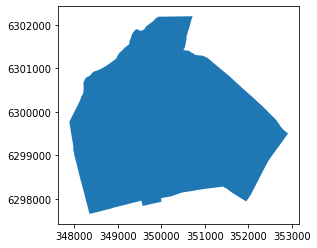

In [17]:
provi.plot()

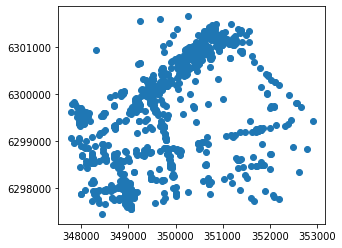

In [18]:
grest.plot()

- Para analizar los datos en conjunto, sería bueno visualizarlos en el mismo gráfico, y editarlo para obtener un mapa más informativo.

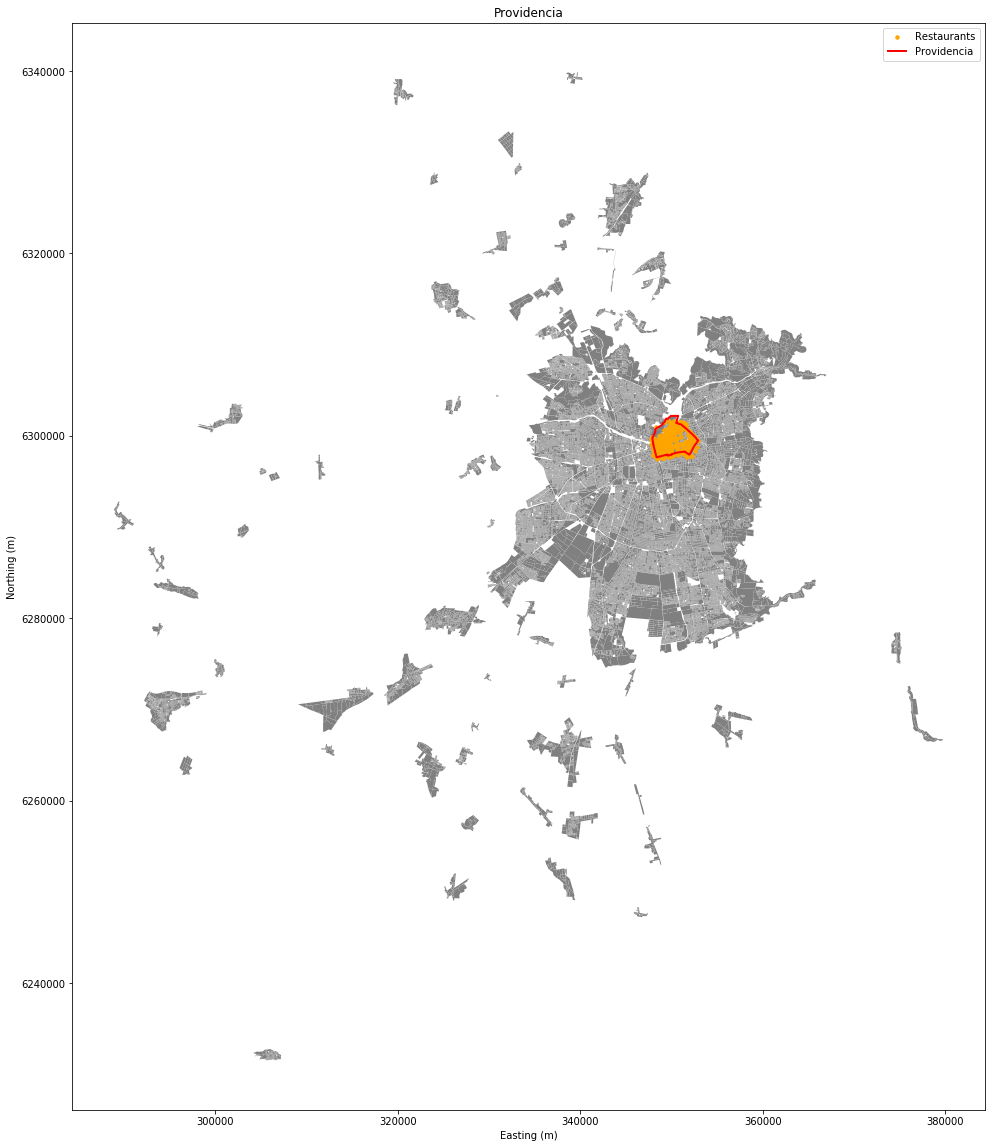

In [21]:
#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz.plot(ax=ax,color='gray',label='Manzanas')
grest.plot(ax=ax,markersize=12,color='orange',label='Restaurants')
provi.boundary.plot(ax=ax,color='red',lw=2,label='Providencia')

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_xlim()
ax.legend()



- Las manzanas cubren toda la región Metropolitana. Para facilitar la visualización y operaciones geométricas, podemos seleccionar sólo aquellas manzanas que caen dentro del polígono de Providencia. Esto se puede hacer de varias formas, por ejemplo con la función `clip`: https://geopandas.org/reference/geopandas.clip.html.

In [23]:
manz_provi=gpd.clip(manz,provi)
print(manz_provi.shape)
print(manz_provi.head())

(625, 17)
      REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
25222     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13123   
25223     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13123   
25224     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13123   
25225     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13123   
25226     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13123   

        NOM_COMUNA  DISTRITO  LOCALIDAD  ENTIDAD_MA  CATEGORIA NOM_CATEGO  \
25222  PROVIDENCIA         7          2           6          1         CD   
25223  PROVIDENCIA         7          2           2          1         CD   
25224  PROVIDENCIA         7          2           4          1         CD   
25225  PROVIDENCIA         7          2           3          1         CD   
25226  PROVIDENCIA         7          2           7          1         CD   

            MANZENT_I  TOTAL_PERS  TOTAL_VIVI  Shape_Leng 

/Users/paguirre/anaconda3/lib/python3.6/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


- También nos falta ubicar y agregar la oficina del SII. Pero en este caso no tenemos una capa vectorial sino sólo su dirección: Suecia 211, Providencia, Región Metropolitana. Usando alguna aplicación de mapas como GoogleMaps, podemos encontrar sus coordenadas geográficas y crear una geometría tipo Punto.

In [24]:
#Coordenadas del SII
from shapely.geometry import Point
SII=[-70.607479,-33.422771,]  #x,y
point= Point(SII)
print(point)
df=pd.DataFrame(['SII'],columns=['Name'])
print(df)
sii= gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=[point])
print(sii)
sii=sii.to_crs('EPSG:32719')
sii.head()

POINT (-70.607479 -33.422771)
  Name
0  SII
  Name                     geometry
0  SII  POINT (-70.60748 -33.42277)


,Name,geometry
0,SII,POINT (350548.487 6300688.073)


0    POINT (350143.852 6299703.638)
dtype: geometry


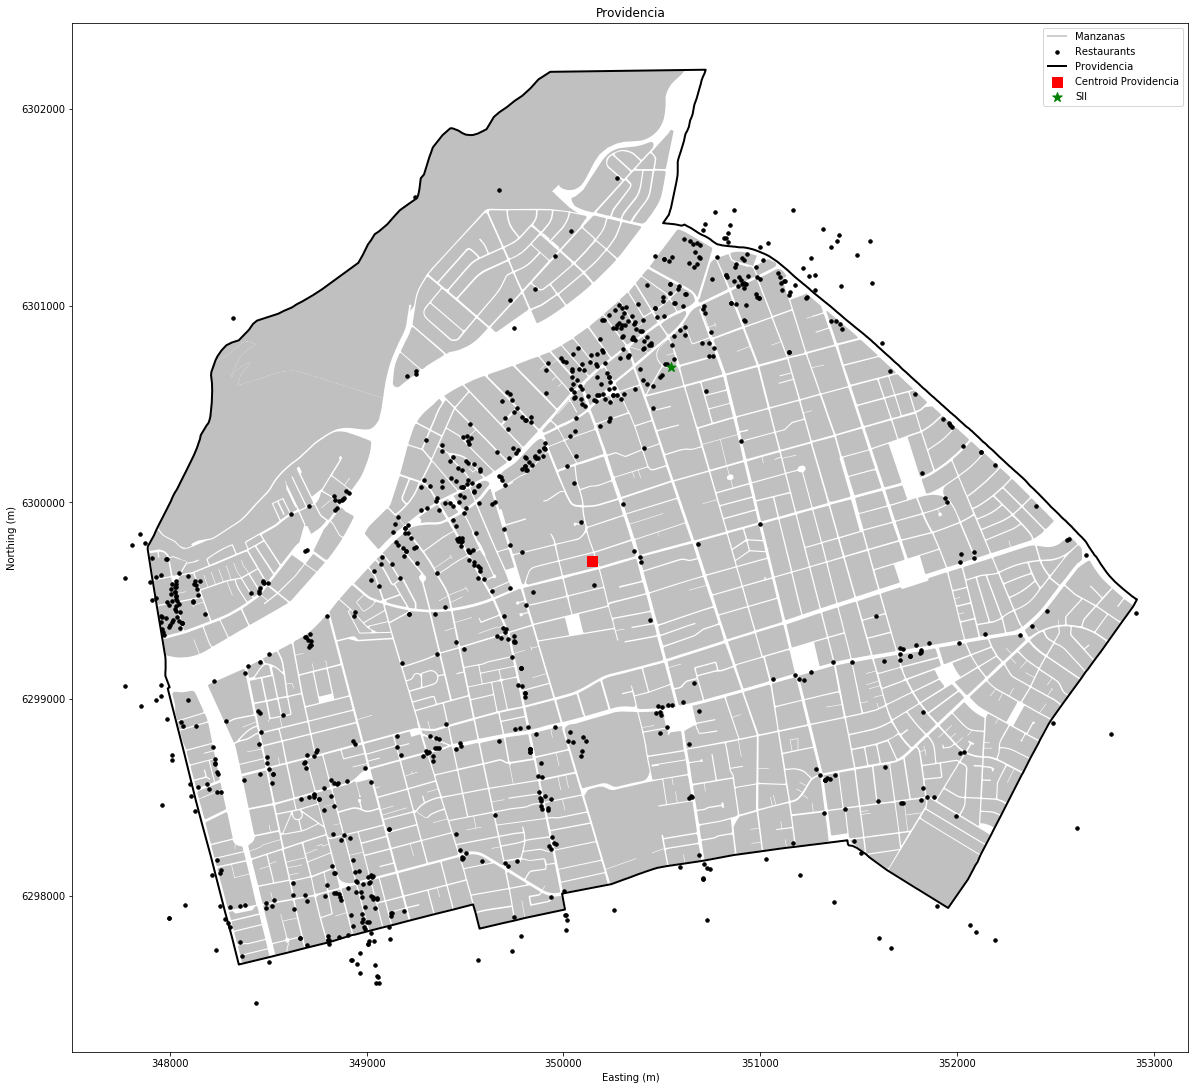

In [27]:
#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz_provi.plot(ax=ax,color='silver',label='Manzanas')
grest.plot(ax=ax,markersize=12,color='k',label='Restaurants')
provi.boundary.plot(ax=ax,color='k',lw=2,label='Providencia')
print(provi.centroid)
provi.centroid.plot(marker='s',ax=ax,markersize=100,color='r',label='Centroid Providencia')

#Graficamos el SII
sii.plot(marker='*',ax=ax,markersize=100,color='g',label='SII')

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.legend()

# 3. Análisis de los datos.

Ahora podemos estudiar y responder algunas de las preguntas planteadas al comienzo del ejercicio:

- **¿Cuál es la superficie y perímetro de la comuna?**

El cálculo del área y perímetro están implementados como atributos del objeto `GeoDataFrame`:

In [28]:
area_provi=provi.area
print('Area Providencia (m^2):',area_provi)

Area Providencia (m^2): 0    1.439415e+07
dtype: float64


In [29]:
area_provi=provi.area/(1e6)
print('Area Providencia (km^2):',area_provi)

Area Providencia (km^2): 0    14.394146
dtype: float64


In [31]:
perimetro=provi.length/(1000)
print('Perimetro (km):',perimetro)

Perimetro (km): 0    16.191935
dtype: float64


- **¿ A qué distancia está el SII del centro de la comuna?**

In [32]:
dist=sii.distance(provi.centroid)/1000
print('Distancia al centro de la comuna (km):',dist)

Distancia al centro de la comuna (km): 0    1.064351
dtype: float64


- **¿Cuáles son las áreas con mayor densidad de población de la comuna?**

Para calcular la densidad de población por manzanas, necesitamos dos datos: la población total por manzana, y el área de cada una de ellas. Con esta información, podemos calcular una nueva columna llama `densidad`, y graficarla como un mapa de colores para identificar las zonas más densamiente pobladas de Providencia. Este tipo de gráficos por atributo se denomina `choropleth`.


In [33]:
manz_provi.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOCALIDAD,ENTIDAD_MA,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Shape_Leng,Shape_Area,geometry
25222,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,6,1,CD,13123071002006,14,4,0.004842,1.085559e-06,"POLYGON ((350519.169 6301694.166, 350515.015 6..."
25223,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,2,1,CD,13123071002002,24,8,0.013713,3.813845e-06,"POLYGON ((350448.088 6301794.075, 350441.611 6..."
25224,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,4,1,CD,13123071002004,27,7,0.003378,6.529306e-07,"POLYGON ((350349.250 6301688.722, 350347.028 6..."
25225,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,3,1,CD,13123071002003,34,10,0.003394,6.530225e-07,"POLYGON ((350308.065 6301643.627, 350305.636 6..."
25226,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,7,1,CD,13123071002007,126,52,0.006645,1.626556e-06,"POLYGON ((350403.470 6301417.002, 350399.662 6..."


In [34]:
manz_provi['densidad']=manz_provi['TOTAL_PERS']/manz_provi['geometry'].area
manz_provi.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOCALIDAD,ENTIDAD_MA,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Shape_Leng,Shape_Area,geometry,densidad
25222,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,6,1,CD,13123071002006,14,4,0.004842,1.085559e-06,"POLYGON ((350519.169 6301694.166, 350515.015 6...",0.001250
25223,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,2,1,CD,13123071002002,24,8,0.013713,3.813845e-06,"POLYGON ((350448.088 6301794.075, 350441.611 6...",0.000610
25224,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,4,1,CD,13123071002004,27,7,0.003378,6.529306e-07,"POLYGON ((350349.250 6301688.722, 350347.028 6...",0.004009
25225,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,3,1,CD,13123071002003,34,10,0.003394,6.530225e-07,"POLYGON ((350308.065 6301643.627, 350305.636 6...",0.005048
25226,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,7,2,7,1,CD,13123071002007,126,52,0.006645,1.626556e-06,"POLYGON ((350403.470 6301417.002, 350399.662 6...",0.007511


Text(124.75, 0.5, 'Northing (m)')

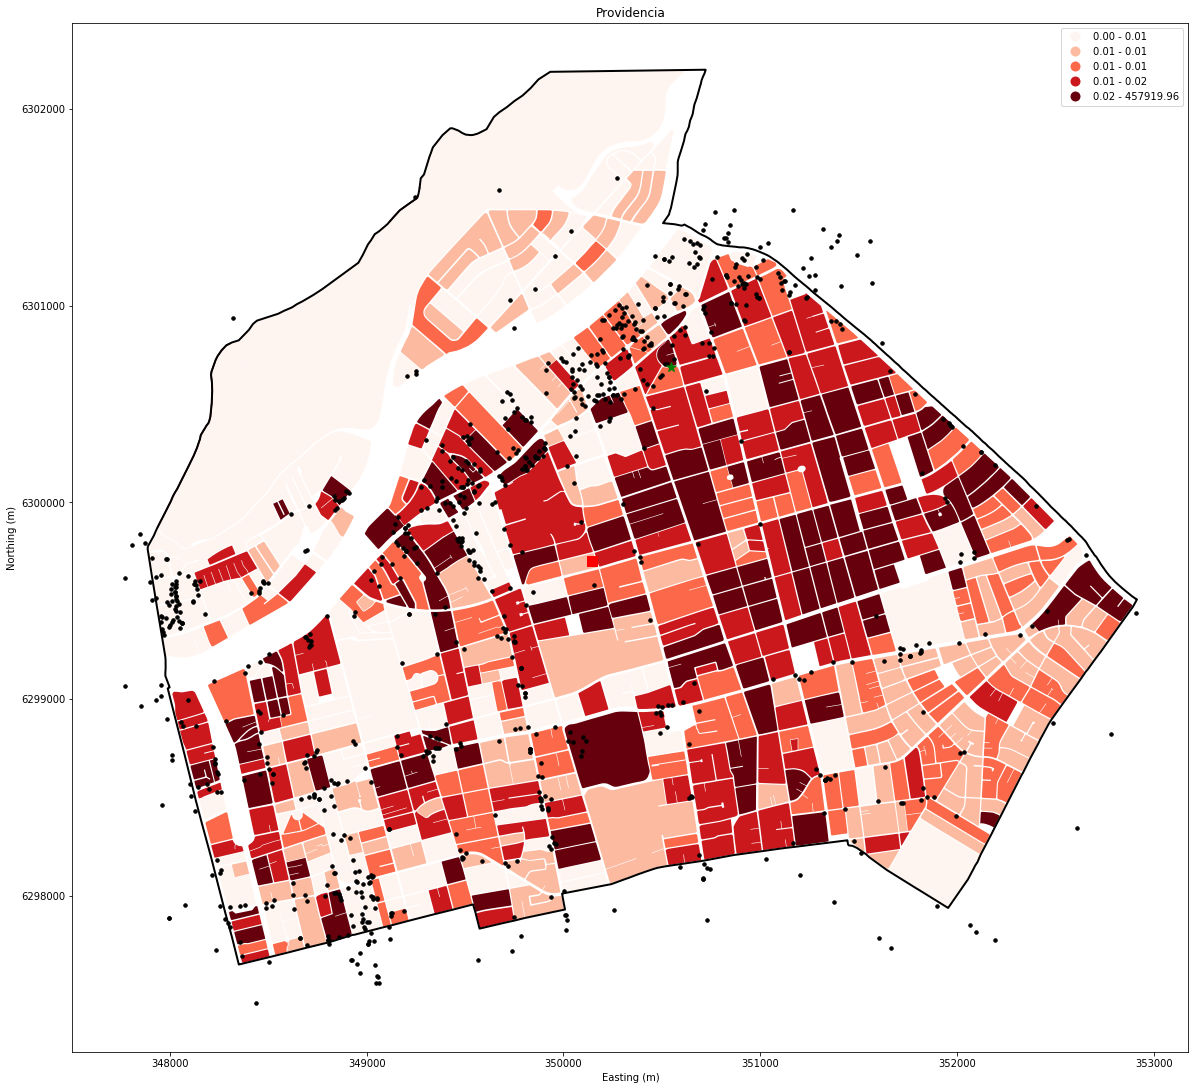

In [38]:
#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz_provi.plot(ax=ax,column='densidad',cmap='Reds',scheme='quantiles',k=5,legend=True)
grest.plot(ax=ax,markersize=12,color='k',label='Restaurants')
provi.boundary.plot(ax=ax,color='k',lw=2,label='Providencia')
provi.centroid.plot(marker='s',ax=ax,markersize=100,color='r')

#Graficamos el SII
sii.plot(marker='*',ax=ax,markersize=100,color='g',label='SII')

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')


- **¿Cuántos restaurants hay a una distancia caminables de las oficinas del SII? ¿Cuál es el más cercano?**

Primero definamos qué consideramos una distancia caminable: por ejemplo, 500 m. Definimeros un buffer o radio de 500 m alrededor del SII, e identificaremos todos los restaurants que caen dentro de dicho radio.

In [39]:
dist_cam=500
buffer=sii.buffer(dist_cam)
print(type(buffer),buffer.crs)


<class 'geopandas.geoseries.GeoSeries'> EPSG:32719


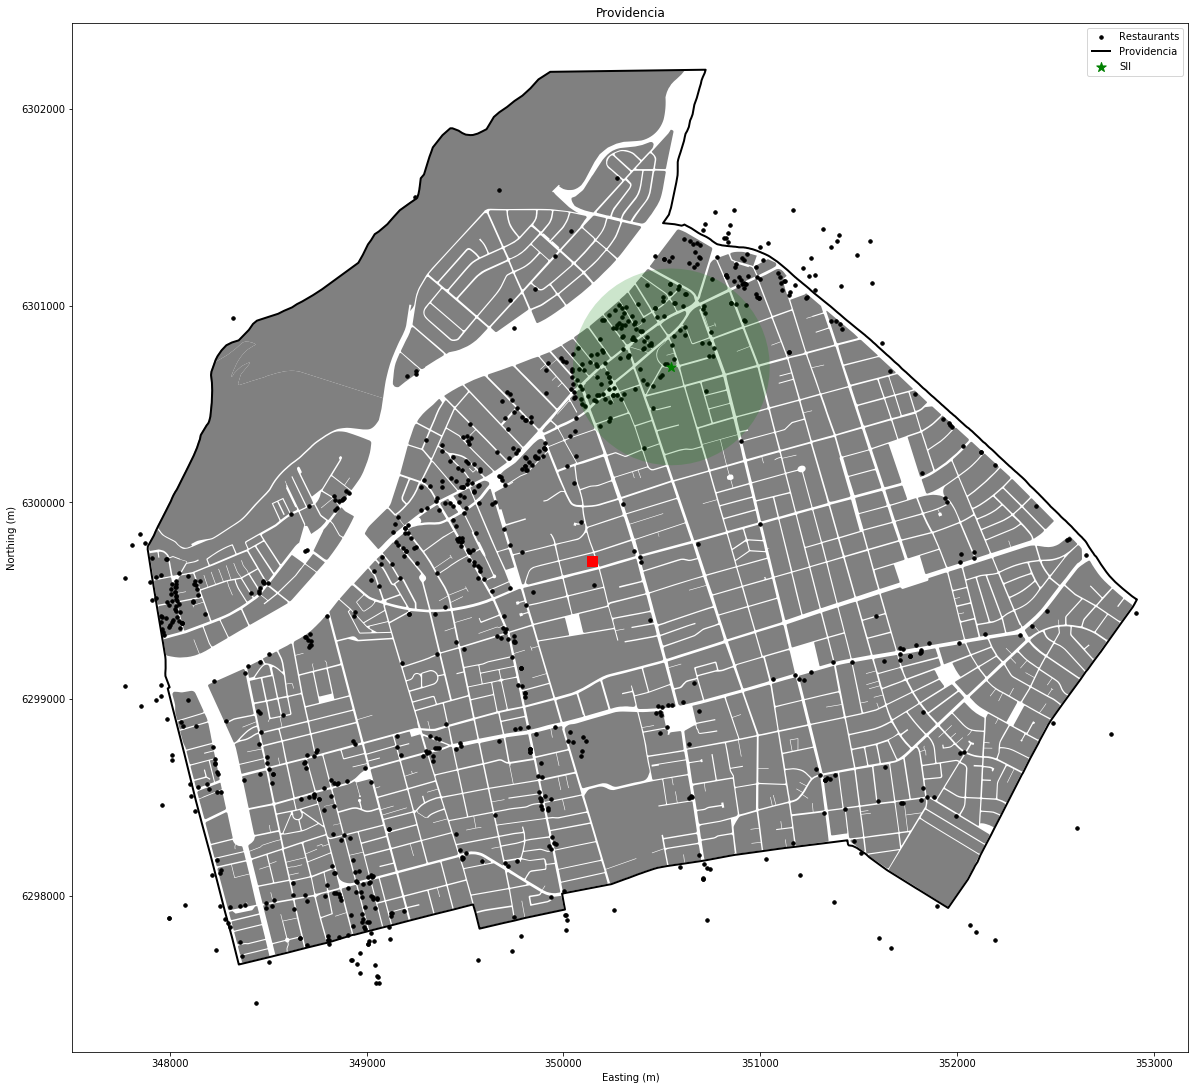

In [43]:
#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz_provi.plot(ax=ax,color='gray')
grest.plot(ax=ax,markersize=12,color='k',label='Restaurants')
provi.boundary.plot(ax=ax,color='k',lw=2,label='Providencia')
provi.centroid.plot(marker='s',ax=ax,markersize=100,color='r')

#Graficamos el SII
sii.plot(marker='*',ax=ax,markersize=100,color='g',label='SII')
buffer.plot(ax=ax,color='g',alpha=0.2)

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.legend()

0      False
1      False
2       True
3      False
4      False
       ...  
897    False
898    False
899     True
900     True
901     True
Length: 902, dtype: bool
N restaurants a distancia caminable del SII: 137


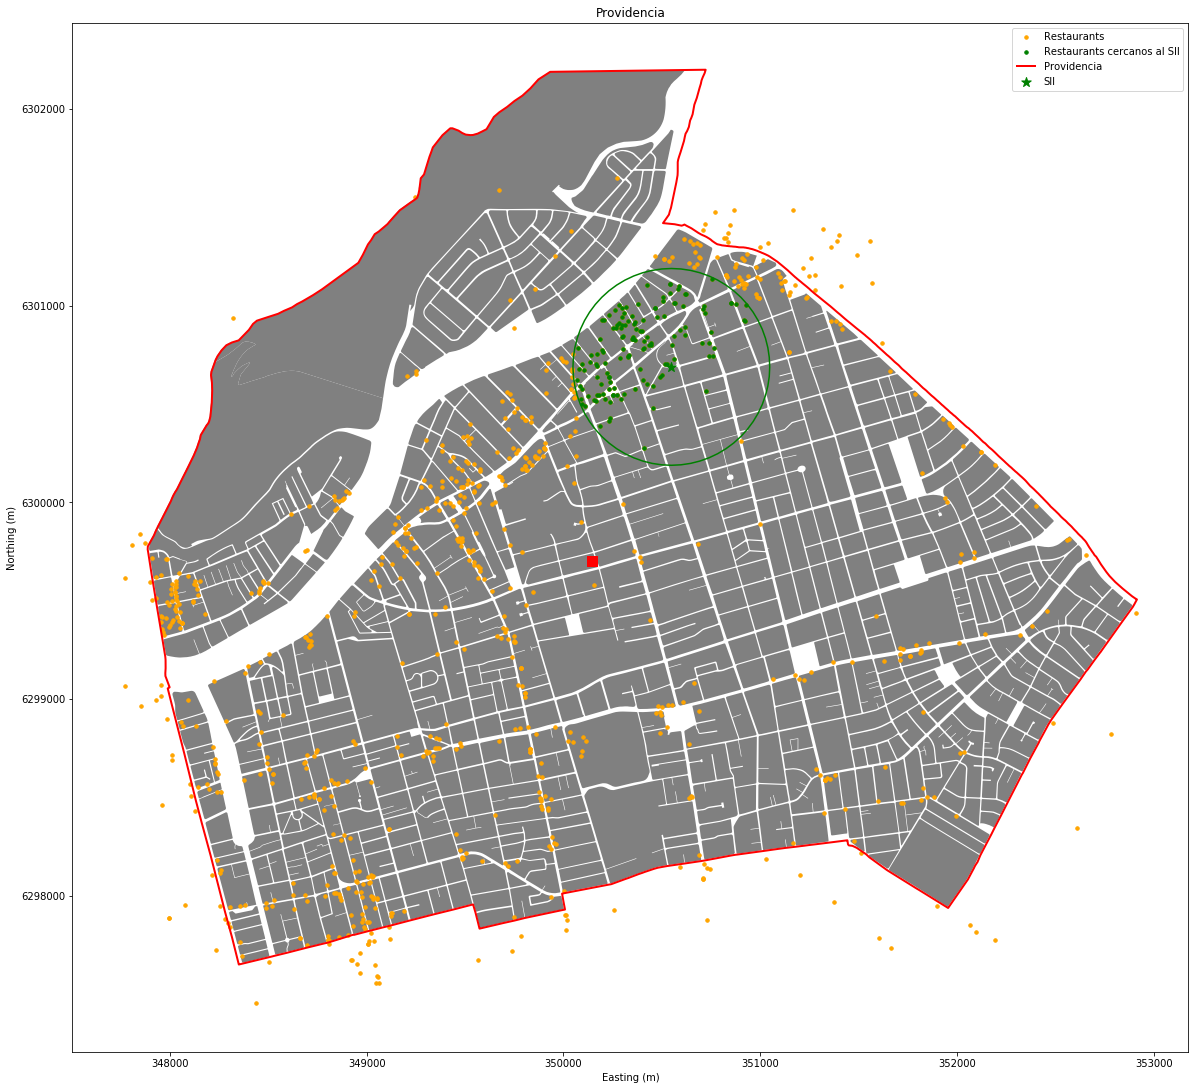

In [45]:
#Creamos una mascara donde todos los restaurants que están "within" el buffer de radio 500 m tienen valor True, y los que están fuera tienen valor False.
mask=grest.geometry.within(buffer.geometry[0])
print(mask)

#Luego seleccionamos los elementos del GeoDataFrame grest que tienen valor True.
restSII=grest[mask]
print('N restaurants a distancia caminable del SII:',mask.sum())

#otra forma equivalente
#grest['distSII']=grest.distance(sii.geometry[0])
#print(grest['distSII'])
#mask2=grest['distSII']<dist_cam
#print('N restaurants a distancia caminable del SII:',mask2.sum())

#Graficamos para verificar

#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz_provi.plot(ax=ax,color='gray')
grest.plot(ax=ax,markersize=12,color='orange',label='Restaurants')
restSII.plot(ax=ax,markersize=12,color='g',label='Restaurants cercanos al SII')
provi.boundary.plot(ax=ax,color='red',lw=2,label='Providencia')
provi.centroid.plot(marker='s',ax=ax,markersize=100,color='r')

#Graficamos el SII
sii.plot(marker='*',ax=ax,markersize=100,color='g',label='SII')
buffer.boundary.plot(ax=ax,color='g')

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.legend()



- **Hay 137 restaurants en un radio de 500 m del SII. Pero, ¿cuál es el más cercano?**

Para responder a esta pregunta calcularemos la distancia entre cada restaurant y el punto correspondiente a la ubicación del SII, y buscamos aquel que corresponde a la mínima distancia.

In [46]:
#Creamos una nueva columna en el GeoDataFrame grest con la distancia de cada restaurant al SII
grest['distSII']=grest.distance(sii.geometry[0])
print(grest.head())

   Unnamed: 0                      Name        lat        lon  \
0           0            Prem de Bokato -33.430917 -70.606187   
1           1                  Caleuche -33.431682 -70.609299   
2           2              Los Maestros -33.426480 -70.609052   
3           3  Don Bono Coffee & Bakery -33.426197 -70.603761   
4           6       Restaurant Jin Ying -33.431168 -70.609647   

                         geometry      distSII  
0  POINT (350682.526 6299786.660)   911.324758  
1  POINT (350394.524 6299697.337)  1002.628301  
2  POINT (350408.552 6300274.572)   436.538073  
3  POINT (350900.044 6300313.541)   513.679530  
4  POINT (350361.268 6299753.886)   952.762812  


In [47]:
closest=grest['distSII'].idxmin()
closest=grest.iloc[closest]
print(closest)

Unnamed: 0                                           4445
Name                                           Palta York
lat                                              -33.4226
lon                                              -70.6077
geometry      POINT (350523.9326647717 6300701.380228823)
distSII                                           27.9283
Name: 854, dtype: object


- **Ahora queremos hacer un análisis similar para todas las manzanas de la comuna. ¿Cuáles de ellas tienen un restaurant a menos de 500 m de distancia?**

El procedimiento es similar a lo que hicimos para el SII: para cada manzana, calculamos la distancia a todos los restaurants, y buscamos el más cercano. Si esta distancia mínima es < 500 m, entonces la manzana tiene un restaurant a dsitnacia caminable.

In [ ]:
def closest_rest(geom, restaurants):
    dist = restaurants.distance(geom)
    idx = dist.idxmin()
    distmin=dist.min()
    closest_rest = restaurants.loc[idx, 'Name']
    return(distmin)

# llamamos la funcion para una mina
print(closest_rest(sii.geometry[0], grest))

# aplicamos la funcion a todas las minas y asignamos el resultado a una nueva columna del dataset de minas

manz_provi['distClosestRest']=manz_provi.geometry.apply(closest_rest, restaurants=grest)
print(manz_provi.head())

goodManz=manz_provi[manz_provi['distClosestRest']<=100]

In [ ]:
#Creamos una figura y agregamos un eje
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)

#Usando el eje ax como argumento para el metodo plot, podemos graficar todos los datasets en el mismo sistema de ejes.
manz_provi.plot(ax=ax,color='silver')
goodManz.plot(ax=ax,color='g',alpha=0.2,label='Manzana donde queremos vivir')
grest.plot(ax=ax,markersize=12,color='k',label='Restaurants')
restSII.plot(ax=ax,markersize=12,color='g',label='Restaurants cercanos al SII')
provi.boundary.plot(ax=ax,color='k',lw=2,label='Providencia')
provi.centroid.plot(marker='s',ax=ax,markersize=100,color='r')

#Graficamos el SII
sii.plot(marker='*',ax=ax,markersize=100,color='g',label='SII')
buffer.boundary.plot(ax=ax,color='g')

#Agregar titulo, etiquetas para los ejes, leyenda, zoom a Providencia
ax.set_title('Providencia')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.legend()